# Project: Medical appointment data analysis-deduce show no show
This Project has been undertaken as part of Data Analysis project under my UDACITY nanodegree assignment.
Dataset referenced, is from Kaggle dataset repository. https://www.kaggle.com/joniarroba/noshowappointments/home

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## <a id='intro'></a>
## Introduction

Motivation-A patient makes a doctor appointment, but many a times no show happens i.e. patient did not turn up on the scheduled appointment time. This dataset from Brazil public hospitals is being analyzed to get an insight, why this show or no show happens and analyzing associated trends.
As per the info provided we have 1,10,527 appointments and 14 variables as part of the data dictionary. At periodic interval I have noted my observations on the dataset.

#### Before we proceed further , we need to have the libraries imported

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Check the working directory and Load dataset

In [68]:
#Check the path of the downloaded file.#The csv file is made available in the python working directory. 
#For ease of working the python working directory is my desktop
import os
print(os.getcwd())

C:\Users\Deepak


## <a id='wrangling'></a>
## Data Wrangling

In this section I am loading the dataset and performing other basic checks and cleaning.

### General Properties

In [69]:
#Loading the dataset and checking the shape
df = pd.read_csv('KaggleV2-May-2016.csv')
df.shape

(110527, 14)

In [70]:
#Checking for columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

###### Column headings of each column are as shown above

In [71]:
'''As per basic info provided with the dataset the explanation for each column are as follows...
*AppointmentID: Identification of each appointment
*Gender: Male or Female
*DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor
*DataAgendamento: The day someone called or registered the appointment
*Age: How old is the patient
*Neighbourhood: Where the appointment takes place
*Scholarship: True or False, indicates if the patient is in the Bolsa Familia program
*Hipertension: True or False
*Diabetes: True or False
*Alcoholism: True or False
*Handcap: True or False
*SMS_received: 1 or more messages sent to the patient
*No-show "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up
'''

'As per basic info provided with the dataset the explanation for each column are as follows...\n*AppointmentID: Identification of each appointment\n*Gender: Male or Female\n*DataMarcacaoConsulta: The day of the actuall appointment, when they have to visit the doctor\n*DataAgendamento: The day someone called or registered the appointment\n*Age: How old is the patient\n*Neighbourhood: Where the appointment takes place\n*Scholarship: True or False, indicates if the patient is in the Bolsa Familia program\n*Hipertension: True or False\n*Diabetes: True or False\n*Alcoholism: True or False\n*Handcap: True or False\n*SMS_received: 1 or more messages sent to the patient\n*No-show "No" indicates if the patient showed up to their appointment and "Yes" if they didn\'t show up\n'

###### Above cell shows the explanation about each column

In [72]:
#Checking the top 5 rows
df.head(5)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [73]:
#Checking the info and data types of each variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


###### Observation  Dataset has 110527 rows and 14 columns and data type of columns are 1 float,5 strings and rest 8 are integers

In [74]:
#Getting the desription of each variables
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

###### Desription of each column are shown above.

###### Observation  Average age of patients taking appointment is 37. Minimum age and maximum age is -1 and 115 respectivey which seems outliers.

#### Checking , if any column has null values

In [75]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

###### Observation No null values in any column

In [76]:
#Checking for duplicated rows
df.duplicated().sum()

0

In [77]:
#Patient Id being the index column , checking how many patients are duplicated
df.PatientId.duplicated().sum()

48228

In [78]:
# Checking number of non-null unique values for each feature
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

###### Observation  No column has nullvalues and no 2 rows are same (duplicate),there may be duplicate values in a column but 48228 patients have done repeat appointment bookings

### Cleaning

#### Romove whitespaces and case consistency building

In [79]:
#As there is inconsistency in the column heading we will lower the case and remove white spaces
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

#### All column headings are now lower cased and space are removed, but still we can correct the spells of each column for better

In [80]:
#Renaming some column names 
df.rename(columns={'handcap':'handicap','scheduledday':'registered_on', 'appointmentday':'appointment_on','no-show':'no_show'},inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'registered_on',
       'appointment_on', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

###### Observation  Above 2 cell execution has brought a consistency in the naming of the columns

###### As a part of dataset cleaning, we have to perform the data type conversion of important columns

In [81]:
#Converting data type of patient id from float to integer
df['patientid'] = df['patientid'].astype('int64')
df['patientid'].dtype

dtype('int64')

#### We can see data type of patientid is now integer

In [82]:
#Now we will change the datatime columns like 'registered_on' and 'appointment_on' to month , week day and hour columns
#To achieve this we have to add  new columns for each datetime column, here we go, method used - 'to_datetime'
#registered_on
df['registered_on'] = pd.to_datetime(df['registered_on'])
# get month and day name and hour from Start Time after convert
df['registered_month'] = df['registered_on'].dt.month
df['registered_day'] = df['registered_on'].dt.day_name()
df['registered_hour'] = df['registered_on'].dt.hour
#appointment_on
df['appointment_on'] = pd.to_datetime(df['appointment_on'])
# get month, day name and hour from Start Time after convert
df['appointment_month'] = df['appointment_on'].dt.month
df['appointment_day'] = df['appointment_on'].dt.day_name()
df['appointment_hour'] = df['appointment_on'].dt.hour

In [83]:
#Checking if the new columns are added correctly or not, just need to check header data of atleact 1 row
df.head(1)

patientid  appointmentid gender             registered_on  \
0  29872499824296        5642903      F 2016-04-29 18:38:08+00:00   

             appointment_on  age    neighbourhood  scholarship  hipertension  \
0 2016-04-29 00:00:00+00:00   62  JARDIM DA PENHA            0             1   

   diabetes  alcoholism  handicap  sms_received no_show  registered_month  \
0         0           0         0             0      No                 4   

  registered_day  registered_hour  appointment_month appointment_day  \
0         Friday               18                  4          Friday   

   appointment_hour  
0                 0

In [84]:
#Also we can check by looking at columns
df.columns

Index(['patientid', 'appointmentid', 'gender', 'registered_on',
       'appointment_on', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show',
       'registered_month', 'registered_day', 'registered_hour',
       'appointment_month', 'appointment_day', 'appointment_hour'],
      dtype='object')

#### 6 new columns added to the base dataset

In [85]:
#Checking the difference between registration time and appointment time to understand waiting time, a new column to be added
df['waiting_time'] = (df['appointment_hour']-df['registered_hour'])
df.head(5)

patientid  appointmentid gender             registered_on  \
0   29872499824296        5642903      F 2016-04-29 18:38:08+00:00   
1  558997776694438        5642503      M 2016-04-29 16:08:27+00:00   
2    4262962299951        5642549      F 2016-04-29 16:19:04+00:00   
3     867951213174        5642828      F 2016-04-29 17:29:31+00:00   
4    8841186448183        5642494      F 2016-04-29 16:07:23+00:00   

             appointment_on  age      neighbourhood  scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   hipertension  diabetes  ...  handicap  sms_received  no_show  \
0             1         0  ...         0             0       No   
1             0         0  ...         0             0       No   
2             0         0  ...         0             0       No   
3             0         0  ...         0             0       No   
4             1         1  ...         0             0       No   

  registered_month  registered_day registered_hour  appointment_month  \
0                4          Friday              18                  4   
1                4          Friday              16                  4   
2                4          Friday              16                  4   
3                4          Friday              17                  4   
4                4          Friday              16                  4   

   appointment_day appointment_hour  waiting_time  
0           Friday                0           -18  
1           Friday                0           -16  
2           Friday                0           -16  
3           Friday                0           -17  
4           Friday                0           -16  

[5 rows x 21 columns]

###### Observation  Zero value of waiting time means same day registration and same day doctor visit, and negative value may not be relevant as doctor visit cannot happen before registration

###### This completes our dataset cleaning

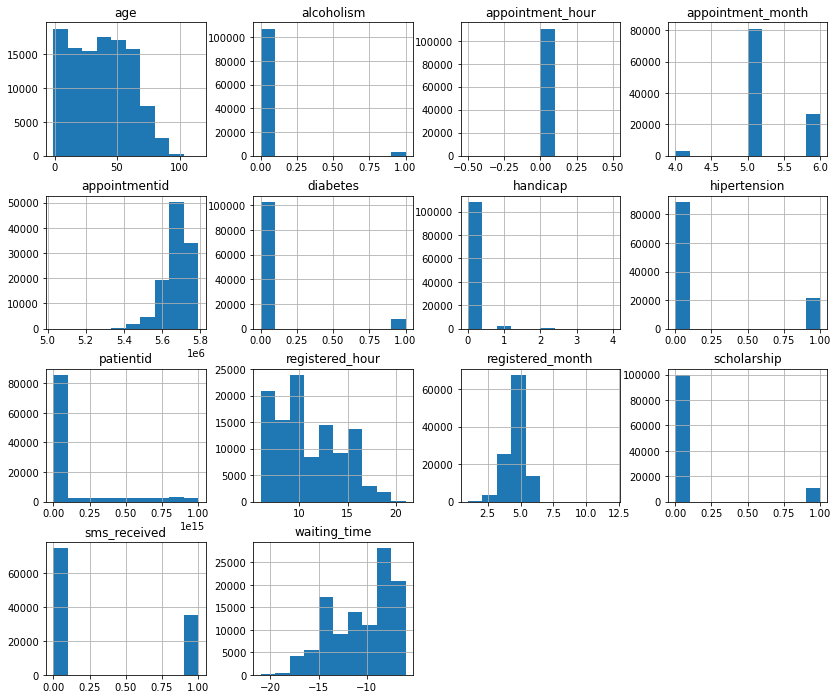

In [86]:
#We can visualize the columns by plotting through histogram
df.hist(figsize=(14,12));

###### Observation  Age, registration hour are right skewed , however waiting time is left skewed.Most patients were non diabetic, non hypertensives, non alcoholics and no scholarships

# <a id='eda'></a>
## Exploratory Data Analysis

We have a clean data set now, to explore and analyze and visualize various aspects

In [87]:
#Lets check the columns again and we can drop columns which does not add any value
df.columns

Index(['patientid', 'appointmentid', 'gender', 'registered_on',
       'appointment_on', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show',
       'registered_month', 'registered_day', 'registered_hour',
       'appointment_month', 'appointment_day', 'appointment_hour',
       'waiting_time'],
      dtype='object')

#### Lets examine Age Distribution

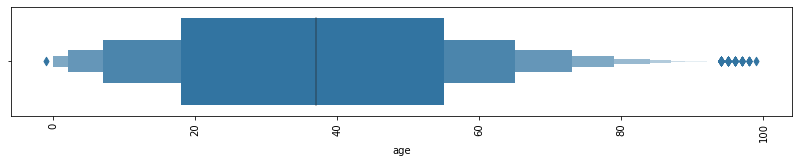

In [88]:
#Lets plot only valid age group patients, by removing outliers, i.e. patients aged more than years zero and less than 115
#plot on seaborn boxenplot
df = df[df['age']<100]
plt.figure(figsize=(14,2))
plt.xticks(rotation=90)
_ = sns.boxenplot(x=df.age)

###### Observation Above boxenplot clearly shows the outliers and mean values

We can check same age distribution through description of the column and on histogram plot

###### Observation  The line between the box plot above , shows the mean age which is 37, majority of patients chunk remains in the age group of 18 to 58, After 80 there are less number of patients and less number of infants(parents) , who took appointment

#### We can try another method of grouping patients across different age groups

In [89]:
#Check the bin edges through age description
df['age'].describe()

count    110516.000000
mean         37.081898
std          23.100661
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max          99.000000
Name: age, dtype: float64

In [90]:
# age data split into groups 
bin_edges = [-1, 18, 37, 55, 99]
# labels for the four age groups
bin_names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['age'], bin_edges, labels=bin_names)
# insert a new column (age_group) before column 7
df.insert(7, 'age_group', age_group)
df.head()

patientid  appointmentid gender             registered_on  \
0   29872499824296        5642903      F 2016-04-29 18:38:08+00:00   
1  558997776694438        5642503      M 2016-04-29 16:08:27+00:00   
2    4262962299951        5642549      F 2016-04-29 16:19:04+00:00   
3     867951213174        5642828      F 2016-04-29 17:29:31+00:00   
4    8841186448183        5642494      F 2016-04-29 16:07:23+00:00   

             appointment_on  age      neighbourhood     age_group  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA  56 and above   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA  56 and above   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA  56 and above   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI          0-18   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA  56 and above   

   scholarship  hipertension  ...  handicap  sms_received  no_show  \
0            0             1  ...         0             0       No   
1            0             0  ...         0             0       No   
2            0             0  ...         0             0       No   
3            0             0  ...         0             0       No   
4            0             1  ...         0             0       No   

   registered_month registered_day  registered_hour appointment_month  \
0                 4         Friday               18                 4   
1                 4         Friday               16                 4   
2                 4         Friday               16                 4   
3                 4         Friday               17                 4   
4                 4         Friday               16                 4   

   appointment_day  appointment_hour waiting_time  
0           Friday                 0          -18  
1           Friday                 0          -16  
2           Friday                 0          -16  
3           Friday                 0          -17  
4           Friday                 0          -16  

[5 rows x 22 columns]

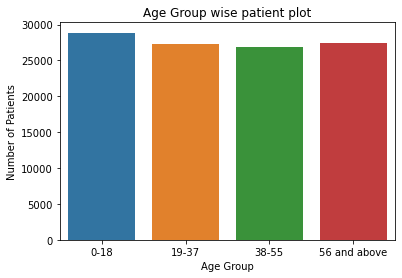

In [91]:
# plot a bar chart
sns.countplot(data = df, x = 'age_group')
plt.title('Age Group wise patient plot')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients');

#### Lets examin gender distribution for appointment

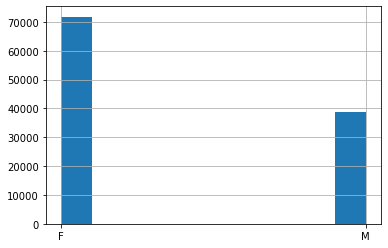

In [92]:
#Gender Distribution
df.gender.hist()

###### Observation Female patients took appoint twice that of male patients

#### Lets apply check how many male vs female patients are there and we will plot different graph for the same

Checking the count and then plotting it

In [93]:
df1 = df.groupby(['gender'])[['patientid']].count()
df1

patientid
gender           
F           71831
M           38685

###### So we have 71830 females and 38685 males

Text(0, 0.5, 'count')

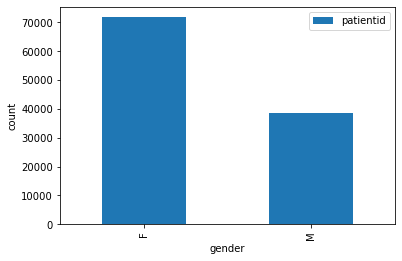

In [94]:
#Now lets plot
df1.plot(kind='bar').set_ylabel('count')

###### Observation Above 3 cells shows us same data using different methods and visualizations

#### Lets check the patient turned up or not on the appointment day

In [95]:
noshowcount = df.no_show.value_counts()
noshowcount

No     88200
Yes    22316
Name: no_show, dtype: int64

###### As explained in the beginning , the dataset shows 'no show' = yes means the patient didnot visit, and no means he visited hence 88199 patients visited as per appointment and 22316 did not

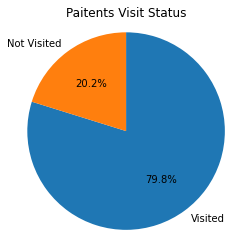

In [96]:
#above data plotting on the piechart
plt.pie(noshowcount, labels = ['Visited', 'Not Visited'], startangle = 90,counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Paitents Visit Status');

###### Above plot shows above data

#### Lets examine the important categorical varaibles and their impact on no show, for the appointment

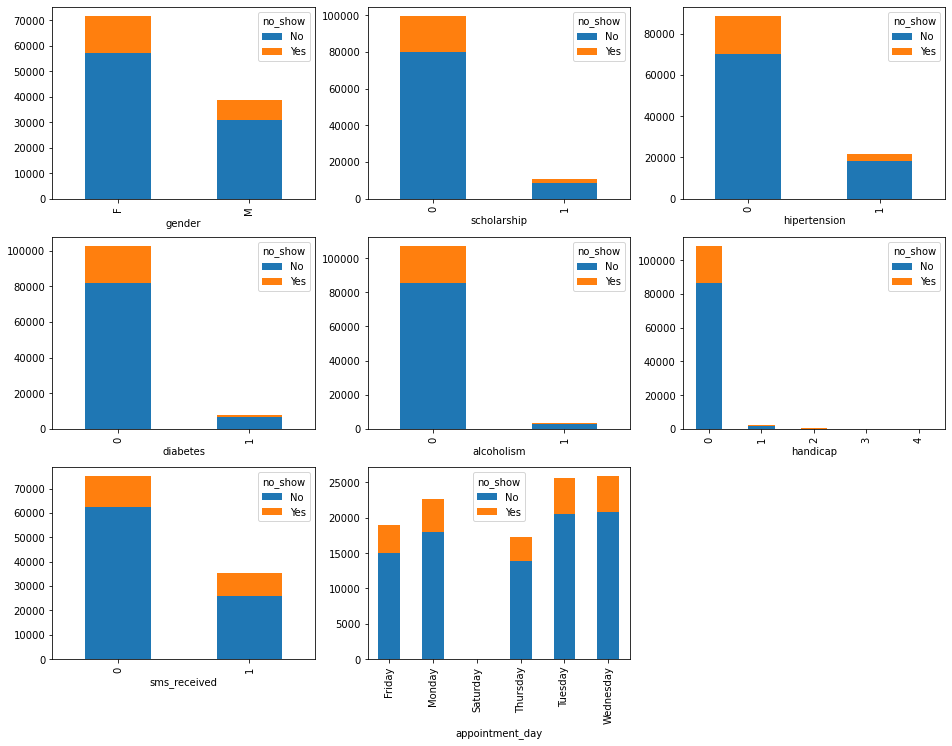

In [97]:
# Out of the availabe columns , lets define a list of catergorical variables , where the classes are 2 or more, 
#all variables except 'appointment_day' and 'handicap' , has 2 values , where as 'appointment_day' has 6 variables which are 6 week days and 4 types of handicaps
cat = ['gender', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received', 'appointment_day']
fig = plt.figure(figsize=(16, 12))
for i, var in enumerate(cat):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)

###### Observatio Above plots shows Diabetic,Hypertensive,Alcoholic, Handicapped and Scholarship patients did not miss appointment i.e. they are more serious about their health than non conditioned ones, Observation Patients did not turn up on week ends,around 20-25% of patients missed appointment on weekdays, Observation Patients responded to SMS for their appointment, 

#### To support above cell , below are the categorical values of each columns, dataframe dot unique (.unique) method used

In [98]:
print(df.gender.unique()), print(df.scholarship.unique()), print(df.hipertension.unique()), print(df.diabetes.unique()), print(df.alcoholism.unique()), print(df.handicap.unique()), print(df.sms_received.unique()), print(df.appointment_day.unique())

['F' 'M']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]
['Friday' 'Tuesday' 'Monday' 'Wednesday' 'Thursday' 'Saturday']


(None, None, None, None, None, None, None, None)

##### Now we will see number of patients on each dependernt like diabetes variables who turned up for the appointment

In [99]:
# No means the patient did turn up on the scheduled day of appointment and Yes means the patient did not turnup
#Representing the integer form of Yes and No
df['no_show_num'] = np.where(df['no_show']== 'Yes', 1,0)

In [100]:
df[['diabetes', 'no_show_num']].groupby(['diabetes'], as_index=False).mean().sort_values(by='no_show_num', ascending=False)

diabetes  no_show_num
0         0     0.203621
1         1     0.180033

###### Observation Above values shows percentage of patients with diabetes and did not show up 20% whereas 18% pateints with diabetes did not show up Examine diabetic gender based patients who got sms and did not vs whether they turned up or not on the appointment day

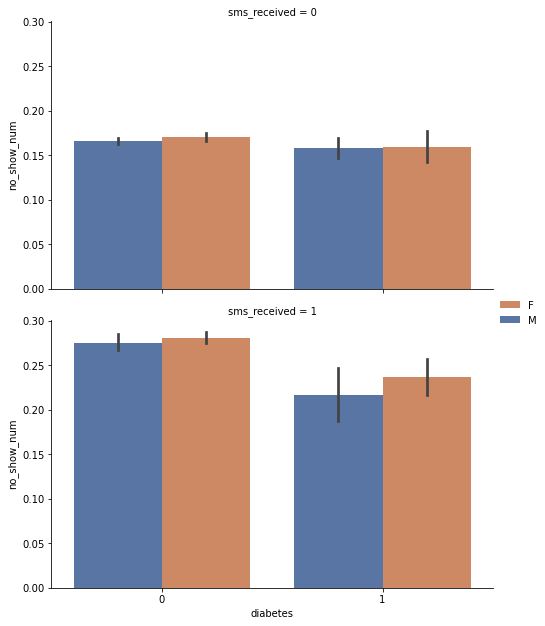

In [101]:
#To get rid of the warning, I am importing and filtering ignore
import warnings
warnings.filterwarnings('ignore')


#Rerun above cell
#Plotting diabetic gender based patients who got sms and did not vs whether they turned up or not on the appointment day
grid = sns.FacetGrid(df, row='sms_received', height=4.4, aspect=1.6)
grid.map(sns.barplot, 'diabetes', 'no_show_num', 'gender', palette='deep', dodge=True)
grid.add_legend();

###### Observation More female patients turned up on appointment day , but looking at second graph ,we can see the diabetics if get an sms, actually did not turn up on the appointment day

#### Examine hypertensive patients who got sms and did not vs whether they turned up or not on the appointment day

'/ km='

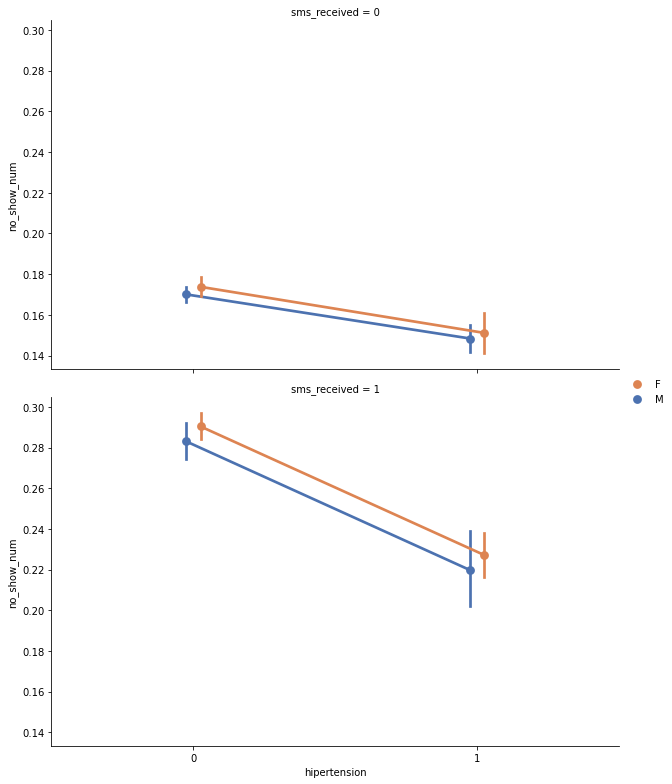

In [102]:
#Plotting hypertensive patients who got sms and did not vs whether they turned up or not on the appointment day
grid = sns.FacetGrid(df, row='sms_received', height=5.5, aspect=1.6)
grid.map(sns.pointplot, 'hipertension', 'no_show_num','gender',palette='deep', dodge=True)
grid.add_legend();"/ km="

#### Observation  Around 23% male hypertensives got sms and turned up , where as around 15% male hypertensive patients did not recieve sms , but turned up, which inferes as sending sms has got an impact on patients visit on the appointment day.

#### Lets explore the corelation of different variables like diseased conditions and handicap situation on no show 

In [103]:
#I am defiing a groupby function on my dataframe to check the impact of conditions on no show
def cond(df, group_by):
    rows=[]
    for item in group_by:
        #np.array((df[item] == level) & (df['no_show_num'] == 0), dtype = bool)
        for level in df[item].unique():
            row = {'condition': item}
            total = len(df[df[item] == level])
            #n = len(df[(df[item] == level) & (df['no_show_num'] == 0)])
            n = len(np.array(df[(df[item] == level) & (df['no_show_num'] == 0)], dtype = bool))
            row.update({'Level': level, 'probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

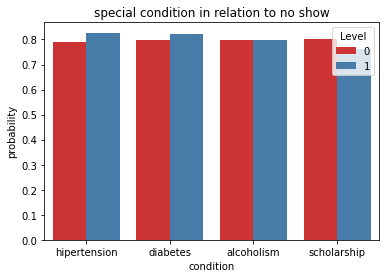

In [105]:
#here I am plotting all diseased conditions as a list, where the catagrical labels are 1 or 0 - binary classification
sns.barplot(data = cond(df,['hipertension', 'diabetes', 'alcoholism', 'scholarship']),
            x = 'condition', y = 'probability', hue = 'Level', palette = 'Set1')
plt.title('special condition in relation to no show')
plt.ylabel('probability')
plt.show()

###### Observation Above binary class variables has got not much impact on the no show, other than hypertension and diabetes

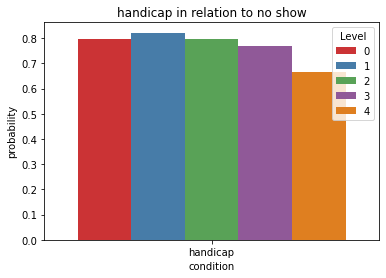

In [106]:
#here I am plotting all diseased conditions where the catagrical labels are multiclass classification
sns.barplot(data = cond(df,['handicap']),
            x = 'condition', y = 'probability', hue = 'Level', palette = 'Set1')
plt.title('handicap in relation to no show')
plt.ylabel('probability')
plt.show()

###### Observation Above multiclass variable shows the severe conditioned handicap has got better outcome in terms of patient turn put

### Question Can we predict whether gender is a variable which has got impact on the patient turn out on the appointment day?

In [ ]:
#lets calculate the percentage of female to male patinets did not showed up
dfns = df[df.no_show_num == 1]
nspg = df.groupby('gender').no_show_num.mean()* 100
nspg

###### Above figures show almost 20% of patients did not show up as per appointment

In [ ]:
# plot a bar chart
plt.bar(x = nspg.index, height = nspg)
plt.title('Gender bases no show patients percentage')
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('No Show Percentage');

###### Observation Above graph further confirms , gender cant be a decisive facotor for patient prediction

### Question- Which age group patients may turn up for sure, can we predict ?

In [ ]:
# percentages of no show patients based on age group
nspa = df.groupby('age_group').no_show_num.mean() * 100
nspa

In [ ]:
# plot a bar chart
plt.figure(figsize = [8, 4])
plt.bar(x = nspa.index, height = nspa)
plt.title('Age group wise patient no show percentage')
plt.xlabel('Age Group')
plt.ylabel('No Show Percentage');

###### Observation Looking at the figures and the plot , we can say young papulation between 50 percentile that means between the age group of 19 to 37 , more chance to miss the appointment

### Question- Can scholarship offering can make a better outcome ?

In [ ]:
# percentages of no show patients based on scholarship
nsps = df.groupby(['scholarship']).no_show_num.mean() * 100
nsps

In [ ]:
# plot a bar chart
plt.bar(x = nsps.index, height = nsps)
plt.title('Scholarship based patient no show percentage')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.ylabel('No Show Percentage');

###### Observation Around 24% patients with scholarship turn up as per appointment where as around 20% did not, so scholarship seems to be an influencing factor for appointment

### Question Can the weekday be a prediction factor , so that patient dont miss the appointment ?

In [ ]:
df['appointment_day'].value_counts()

In [ ]:
# percentages of no show appointments based on week day
nspw = df.groupby('appointment_day').no_show_num.mean() * 100
nspw

###### Observation we can see majority of patients missed appointment on Saturday where as Wednesday and Thursday are best turnout, hence weekday appointments are possible sure for patient turnout

## <a id='conclusions'></a>
## Conclusions

I conclude the follwoing points after executing this kaggle data set. Before executing each cell I have mentioned the purpose of execution. Observations have been recorded along with one or 2 cells execution

###### Limitation
Only Brazil data was presented. Other nation data can give a better insight.
Kaggle dataset need to be updated , but for practice and project assignment point of view its fine.
Exact time of registraion of the call and appoint time will provide better analysis because we have to discard all values which are negative time

###### References
Python libraries like pandas, numpy, matplotlib, seaborn etc. has been used for the dataset analysis, 
I have tried to give a flavor of different types of plots,
Most generic used methods have been used to deduce the values and vizualization.
At times stackoverflow and geeksforgeeks websites were referenced for clarifiaction.